In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import no_uncertainty
import robust_uncertainty
import numpy as np

In [7]:
iter=1500
mu_d = 13.0
gan = 15.0
beta = 0.9
sig = -1e-9

rho = 0.05
c_d = 1.
ponji = 1e-9
seed = 7

nomis=[11.63874334 11.81576177 11.76697252 11.7704092  11.81308108]
mis=[11.63874334 11.81576177 11.76697252 11.7704092  11.81308108]
c_diff=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
nomis util = -33.263480061980516
mis util = -33.263480061980516
ganmma = 15.0
mean of consumption w\o mis = 8.689487792815186
mean of consumption w\ mis  = 8.689487792815186
Dp_nomis=
[[ 1.12980457e+02 -3.51964048e+00 -3.73472962e+00]
 [-3.51964048e+00  1.09646126e-01  1.16346722e-01]
 [-3.73472962e+00  1.16346722e-01  1.23456801e-01]]
Dp_mis=
[[ 1.12980457e+02 -3.51964048e+00 -3.73472962e+00]
 [-3.51964048e+00  1.09646126e-01  1.16346722e-01]
 [-3.73472962e+00  1.16346722e-01  1.23456801e-01]]


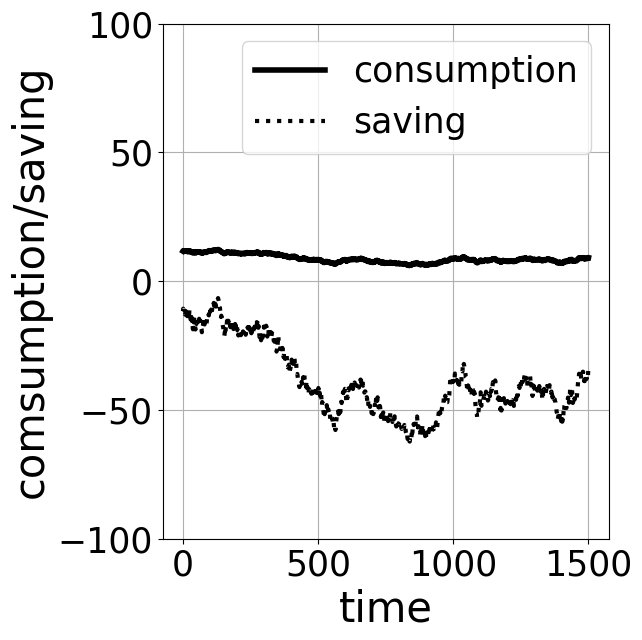

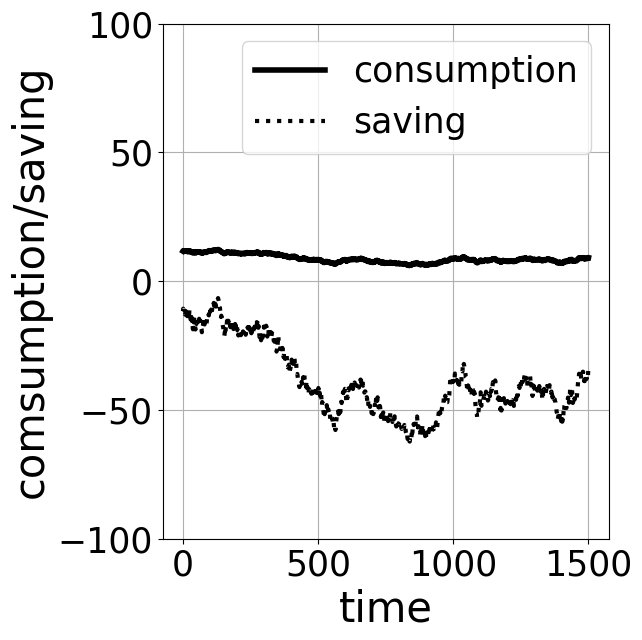

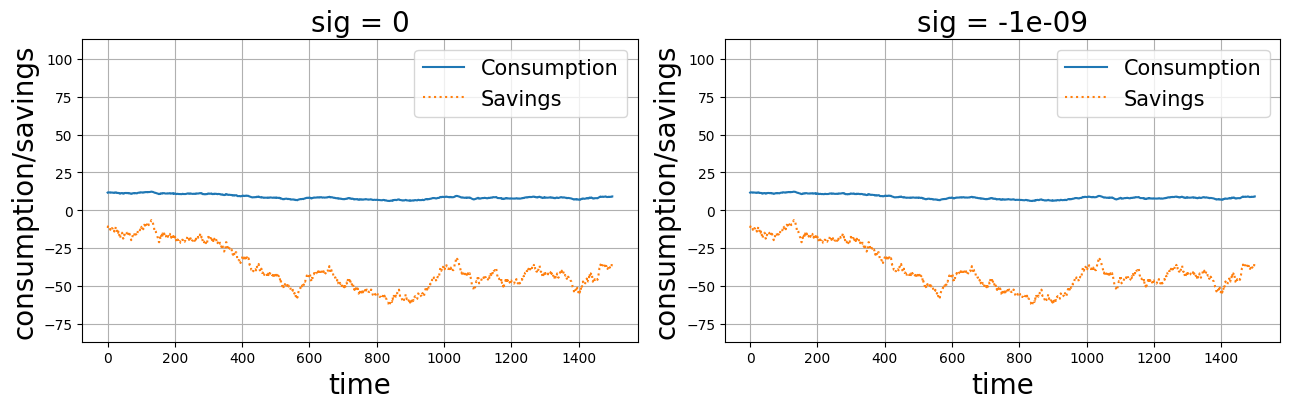

In [8]:
rolq = robust_uncertainty.mis(
    rho, mu_d, gan, c_d, sig, beta, ponji=ponji, iter=iter, seed=seed
)
y_mis,_,_,c_mis=rolq.state_transition()
_,_,_,c_nomis=rolq.nomis_state_transition()
print(f"nomis={c_nomis[:5]}")
print(f"mis={c_mis[:5]}")
print(f"c_diff={c_mis[:10]-c_nomis[:10]}")
i=0
while i<len(c_mis):
    if c_mis[i]>c_nomis[i]:
        print(i)
        break
    i=i+1
rolq.mis_plot_time_series(d_plot=False, y_lim=True,size=True)
rolq.nomis_plot_time_series(d_plot=False, y_lim=True,size=True)
# rolq.compare_discounted_utilities()
print(f"nomis util = {rolq.compare_discounted_utilities()[0][-1]}")
print(f"mis util = {rolq.compare_discounted_utilities()[1][-1]}")
# rolq.plot_immediate_payoff()
# rolq.plot_discounted_utility()
# rolq.plot_compare_consumption()
# rolq.plot_savings_per_period()
rolq.plot_consumption_and_savings_comparison(d_plot=False, y_lim=True)
rolq.mean_consumption()
_,_,_,Dp_nomis=rolq.nomis_olrprobust()
_,_,_,Dp_mis=rolq.olrprobust()
print(f"Dp_nomis=\n{Dp_nomis}")
print(f"Dp_mis=\n{Dp_mis}")


In [9]:
beta = 0.9
sig = -1e-9
rolq = robust_uncertainty.mis(
    rho, mu_d, gan, c_d, sig, beta, ponji=ponji, iter=iter, seed=seed
)
F,_,_,_=rolq.olrprobust()
print(F)

[[-3.36125666  0.10471205  0.11111112]]


In [10]:
beta = 0.9
sig = -1e-1
rolq = robust_uncertainty.mis(
    rho, mu_d, gan, c_d, sig, beta, ponji=ponji, iter=iter, seed=seed
)
F,_,_,_=rolq.olrprobust()
print(F)

[[-3.72926624  0.11617652  0.1232762 ]]
